In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.ops.losses.losses_impl import log_loss

In [37]:
df = pd.read_csv('data/gym_churn_us.csv')

df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [3]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,log_loss

# categorical_df = filtered_df[['Attrition','OverTime']]
# numerical_df = filtered_df[[
#     'Age', 'EnvironmentSatisfaction', 'JobInvolvement',
#     'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
#     'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
#     'YearsInCurrentRole', 'YearsWithCurrManager'
# ]]
#
# encoder = OneHotEncoder(drop='first', sparse_output=False)
#
# encoded_df = encoder.fit_transform(categorical_df)
# encoded_cols = ['Attrition', 'OverTime']
#
# # 인코딩 후 합침
# X_encoded_df = pd.DataFrame(encoded_df, columns=encoded_cols, index=filtered_df.index).astype(int)
# df = pd.concat([numerical_df, X_encoded_df], axis=1)
#
# df


In [36]:
import torch
model_obj = torch.load('model/scaler.pkl', map_location='cpu')

print(type(model_obj))
print(model_obj)


C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\torch\_weights_only_unpickler.py:549: UserWarning: Detected pickle protocol 4 in the checkpoint, which was not the default pickle protocol used by `torch.load` (2). The weights_only Unpickler might not support all instructions implemented by this protocol, please file an issue for adding support if you encounter this.
  warnings.warn(


UnpicklingError: Weights only load failed. In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
Please file an issue with the following so that we can make `weights_only=True` compatible with your use case: WeightsUnpickler error: Unsupported operand 149

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

In [12]:
# 데이터 준비
X = df.drop(columns=['Churn','Phone'])
y = df['Churn']
X

,gender,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,12,0,33,2.406023,12.0,8,2.284497,2.349070
3996,0,1,0,0,1,1,29,68.883764,1.0,1,1.277168,0.292859
3997,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439
3998,0,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237


In [27]:
# 데이터 저장
X.to_csv('data/test_data.csv', index=False, encoding='utf-8-sig')

In [6]:
import warnings

# use_label_encoder와 feature names warning 제거
warnings.filterwarnings("ignore", message=".*use_label_encoder.*")
warnings.filterwarnings("ignore", message=".*valid feature names.*")

def select_best_estimator(X_train, y_train, X_test, y_test):
    # 여러 모델과 해당 모델에 대한 하이퍼 파라미터 후보를 딕셔너리 형태로 정의
    # key: 모델 이름, value: (모델 객체, 하이퍼 파라미터 딕셔너리)
    models = {
        'RandomForest': (
            RandomForestClassifier(),
            {
                'n_estimators': [50, 100, 200],         # 트리 개수
                'max_depth': [None,5, 10, 15],          # 트리 최대 깊이
                'min_samples_split': [2, 5, 10],        # 내부 노드를 분할하기 위한 최소 샘플 수
                'min_samples_leaf': [1, 2, 4]           # 리프 노드에 있어야 하는 최소 샘플 수
            }
        ),
        'XGBoost': (
            XGBClassifier(eval_metric='logloss'),
            {
                'n_estimators': [50, 100, 200],         # 트리 개수
                'max_depth': [5, 7, 9],                 # 트리 최대 깊이
                'learning_rate': [0.01, 0.05, 0.1],     # 학습률
                'subsample': [0.8, 1.0],                # 샘플링 비율
                'colsample_bytree': [0.8, 1.0]          # 특성 샘플링 비율
            }
        ),
        'SVC': (
            SVC(probability=True),
            {
                'C': [0.1, 1, 10],                      # 정규화 강도
                'kernel': ['rbf'],                      # 커널 종류
                'gamma': ['scale', 'auto'],             # 감마 파라미터
                'class_weight': [None, 'balanced'],     # 클래스 불균형 조정
                'shrinking': [True, False]
            }
        ),
        'MLP': (
            MLPClassifier(max_iter=5000),
            {
                'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], # 은닉층 구조
                'activation': ['relu', 'tanh'],                      # 활성화 함수
                'alpha': [0.001, 0.01],                              # L2 규제 계수
                'solver': ['adam']                                   # 최적화 알고리즘
            }
        ),
    }

    # StratifiedKFold를 사용해 데이터셋을 계층적으로 나누어 교차 검증
    skf = StratifiedKFold(n_splits=5, shuffle=True)

    # 각 모델의 결과를 저장할 리스트
    results = []
    loss_res = []

    # models.items()는 딕셔너리의 (key, value) 쌍을 반환
    # name은 모델 이름(문자열), (model, params)는 모델 객체와 파라미터 딕셔너리를 의미
    for name, (model, params) in models.items():
        # GridSearchCV로 하이퍼 파라미터 탐색(f1-score를 기준)
        grid = GridSearchCV(model, params, scoring='f1', cv=skf, n_jobs=-1)
        grid.fit(X_train, y_train)  # 학습 데이터로 그리드 탐색 수행

        # 최적 모델로 테스트 데이터 예측
        y_pred = grid.predict(X_test)
        y_pred_proba = grid.predict_proba(X_test) # 손실 구함

        # 모델 평가 지표 계산
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        loss = log_loss(y_test,y_pred_proba)

        # 각 모델의 평가 결과 출력
        print(f"[{name}]")
        print(f"  최적 파라미터 : {grid.best_params_ if grid.best_params_ else 'Default'}")
        print(f"  정확도  : {accuracy:.4f}")
        print(f"  정밀도  : {precision:.4f}")
        print(f"  재현율  : {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        print("-" * 50)

        # 결과 리스트에 (모델명, 최적 모델, 최적 파라미터, 정밀도, 재현율, f1) 저장
        results.append((name, grid.best_estimator_, grid.best_params_, precision, recall, f1, accuracy))
        loss_res.append((name,loss))

    # Recall을 점수를 우선으로, 동일하면 F1_score과 Precision을 기준으로 최고 모델 선택
    best_model = max(results, key=lambda x: (x[5], x[4], x[3],x[6]))  # x[5]=f1_score, x[3]=정밀도, x[4]=재현율
    best_model_name, best_model_instance, best_params, precision, recall, f1, accuracy = best_model
    # 순서대로 모델 이름, 모델 객체, 최적의 파라미터, 정밀도, 재현율, f1, 정확도

    # 최적 모델 평가 결과 출력
    print("\n" + "-" * 27)
    print("모델 평가 결과")
    print("-" * 27)
    print(f"최적의 모델  : {best_model_instance.__class__.__name__}")
    print(f"최적의 파라미터  : {best_params}")
    print(f"정확도  : {accuracy:.4f}")
    print(f"정밀도  : {precision:.4f}")
    print(f"재현율  : {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 27)

    # 최적 모델 이름, 모델 객체, 하이퍼 파라미터 반환, 손실값
    return best_model_name, best_model_instance, best_params, loss_res


In [7]:
from collections import defaultdict

def record_model(n):
    loss_history = defaultdict(list)
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

        # 스케일링
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 최적의 모델 선택 및 학습
        best_model_name, _, _, loss = select_best_estimator(X_train_scaled, y_train, X_test_scaled, y_test)
        loss_history[best_model_name].append(loss)

    return loss_history

loss_history = record_model(1)

[RandomForest]
  최적 파라미터 : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
  정확도  : 0.9163
  정밀도  : 0.8718
  재현율  : 0.8019
  F1 Score: 0.8354
--------------------------------------------------
[XGBoost]
  최적 파라미터 : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
  정확도  : 0.9375
  정밀도  : 0.9050
  재현율  : 0.8538
  F1 Score: 0.8786
--------------------------------------------------


KeyboardInterrupt: 

C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO

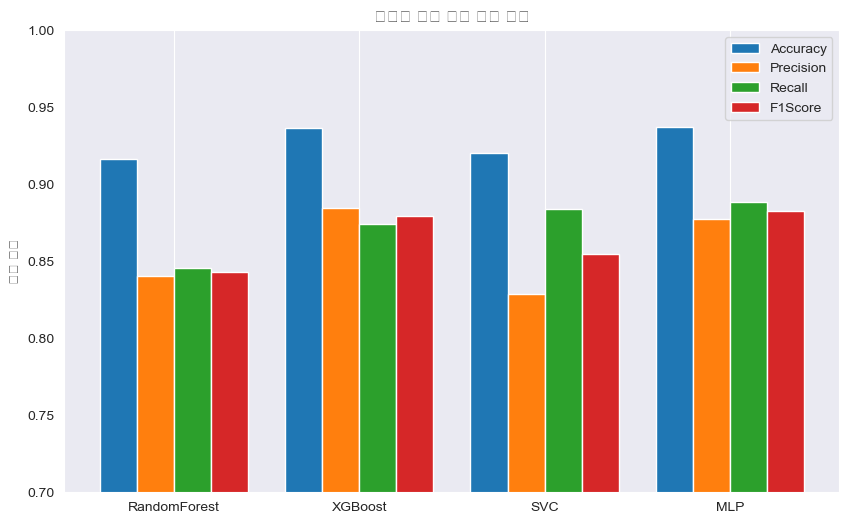

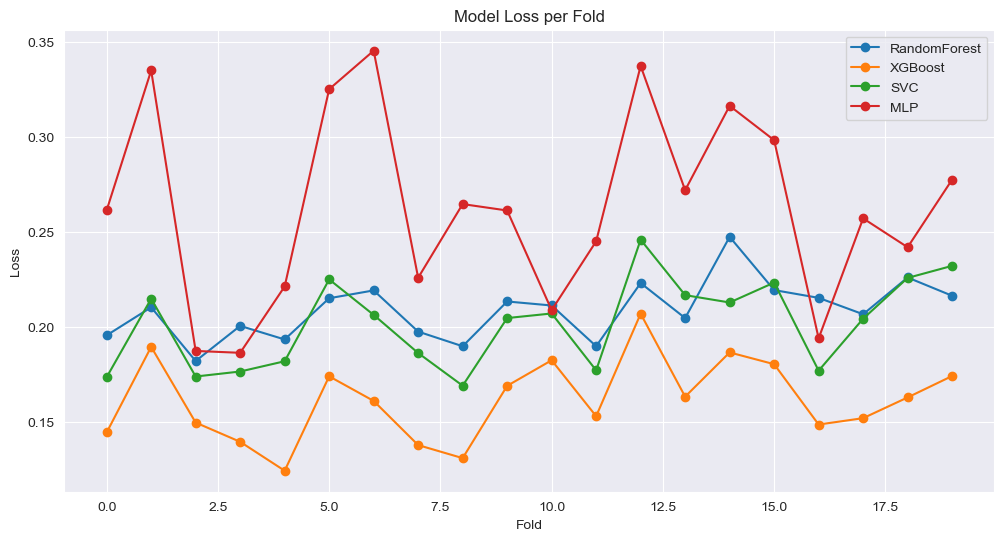

In [8]:
files = {
    "RandomForest": "data/RandomForest_metrics.csv",
    "XGBoost":      "data/XGBoost_metrics.csv",
    "SVC":          "data/SVC_metrics.csv",
    "MLP":          "data/MLP_metrics.csv",
}

metrics_avg = {}
for model, path in files.items():
    metrics_df = pd.read_csv(path)
    metrics_avg[model] = metrics_df.mean(numeric_only=True)   # 숫자 열만 평균

avg_df = pd.DataFrame(metrics_avg).T   # 행: 모델, 열: 지표

labels  = avg_df.index.tolist()
metrics = avg_df.columns.tolist()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, avg_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(labels)
ax.set_ylim(0.7, 1.0)
ax.set_title("모델별 평가 지표 평균 비교")
ax.set_ylabel("평균 점수")
ax.legend()
ax.grid(axis="y")

plt.show()

df_loss = pd.read_csv("data/loss_per_model.csv")

plt.figure(figsize=(12, 6))
for column in df_loss.columns:
    plt.plot(df_loss.index, df_loss[column], marker='o', label=column)

plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Model Loss per Fold')
plt.legend()
plt.grid(True)
plt.show()

## RandomForest (주요 파라미터)
- max_depth: 15
- min_samples_leaf: 1
- min_samples_split: 2
- n_estimators: 200

## XGBoost (주요 파라미터)
- colsample_bytree: 0.8
- learning_rate: 0.1
- max_depth: 5
- n_estimators: 200
- subsample: 0.8

## SVC (주요 파라미터)
- C: 10
- kernel: rbf
- gamma: scale
- class_weight: None
- shrinking: True

## MLP (주요 파라미터)
- activation: tanh
- alpha: 0.01
- hidden_layer_sizes: (100, 50)
- solver: adam


In [15]:
# 데이터 분류
X,y

(      gender  Near_Location  Partner  Promo_friends  Contract_period  \
 0          1              1        1              1                6   
 1          0              1        0              0               12   
 2          0              1        1              0                1   
 3          0              1        1              1               12   
 4          1              1        1              1                1   
 ...      ...            ...      ...            ...              ...   
 3995       1              1        1              0               12   
 3996       0              1        0              0                1   
 3997       1              1        1              1               12   
 3998       0              1        1              1                6   
 3999       1              0        1              0               12   
 
       Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
 0                1   29                 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

# 스케일링
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 최적의 모델 선택 및 학습
skf = StratifiedKFold(n_splits=5, shuffle=True)

params = {
    'colsample_bytree': [0.8],
    'learning_rate': [0.1],
    'max_depth': [5],
    'n_estimators': [200],
    'subsample': [0.8]
}

# 모델
model = XGBClassifier(eval_metric='logloss')

# GridSearchCV
grid = GridSearchCV(model, params, scoring='f1', cv=skf, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# 테스트 데이터 예측
y_pred = grid.predict(X_test_scaled)
y_pred_proba = grid.predict_proba(X_test_scaled)

# 평가 지표
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 출력
print(f"[XGBoost]")
print(f"  최적 파라미터 : {grid.best_params_ if grid.best_params_ else 'Default'}")
print(f"  정확도  : {accuracy:.4f}")
print(f"  정밀도  : {precision:.4f}")
print(f"  재현율  : {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print("-" * 30)

best_model = {
    'model': grid.best_estimator_,
    'scaler': scaler,
    'best_params': grid.best_params_,
}


[XGBoost]
  최적 파라미터 : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
  정확도  : 0.9475
  정밀도  : 0.9167
  재현율  : 0.8821
  F1 Score: 0.8990
------------------------------


In [31]:
best_model


{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, ...),
 'scaler': RobustScaler(),
 'best_params': {'colsample_bytree': 0.8,
  'learning_rate': 0.1,
  'max_depth': 5,
  'n_estimators': 200,
  'subsample': 0.8}}

In [29]:
import joblib
# # 모델 저장
joblib.dump(best_model, "model/model.joblib")

['model/model.joblib']

In [21]:
# 모델 불러오기
loaded_model = joblib.load("model/model.joblib")

In [30]:
# 불러 온 모델 시험 테스트
model = loaded_model['model']
scaler = loaded_model['scaler']
best_params = loaded_model['best_params']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# 평가 지표
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 출력
print(f"[XGBoost]")
print(f"  최적 파라미터 : {best_params}")
print(f"  정확도  : {accuracy:.4f}")
print(f"  정밀도  : {precision:.4f}")
print(f"  재현율  : {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print("-" * 30)


[XGBoost]
  최적 파라미터 : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
  정확도  : 0.9475
  정밀도  : 0.9167
  재현율  : 0.8821
  F1 Score: 0.8990
------------------------------
